### Python Selenium - Multiple pages -while loop -tabular data

url : https://cekbpom.pom.go.id/obat

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
#from selenium.webdriver.support.ui import select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [15]:
import requests
from bs4 import BeautifulSoup

In [146]:
website = 'https://cekbpom.pom.go.id/obat'

In [147]:
#get request
response = requests.get(website)

In [148]:
response.status_code

200

### Headings

- Registration_No
- Date_of_Issue
- Product_Name
- Packaging
- Manufacturer

In [ ]:
website = 'https://cekbpom.pom.go.id/obat'
# chrome_options = Options()
# chrome_options.add_argument("--lang=en");
# chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
# prefs = {
#         "translate_whitelists": {'id':'en'},
#        "translate":{"enabled":"True"}}
# chrome_options.add_experimental_option("prefs", prefs)
#creating driver variable and providing the path where the chrome driver is stored
# driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe',options=chrome_options)
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(2)
driver.get(website)
time.sleep(2)
driver.maximize_window()
time.sleep(2)

In [66]:
#Get the html associated with each posting
postings = driver.find_elements(By.XPATH, "//div[@class = 'kt-inbox__item kt-inbox__item--unread']")

In [67]:
len(postings)

10

#### Registration_No

In [95]:
driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread']/div['kt-inbox__details'][2]").text.split('\n')[0]

'DTL2211704210A1'

#### Date_of_Issue

In [96]:
driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread']/div['kt-inbox__details'][2]").text.split('\n')[1]

'Terbit: 12-07-2023'

#### Product_Name

In [105]:
driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread']/div['kt-inbox__details'][3]/div/span").text

'BATUKSIN PLUS'

#### Packaging

In [106]:
driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread']/div['kt-inbox__details'][3]/div/span[2]").text

'Merk: -\nKemasan: DUS, 25 CATCH COVER @ 1 STRIP @ 4 TABLET'

#### Manufacturer

In [108]:
driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread']/div['kt-inbox__details'][4]/div/span").text

'PERUSAHAAN DAGANG DAN INDUSTRI KALIROTO - Indonesia'

#### NEXT Button:

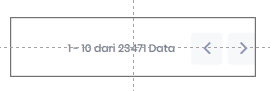

- One page lists 10 products
- how many pages for 23471 products?
- 231 pages approximately

In [110]:
NEXT = driver.find_element(By.ID , 'next')

In [111]:
NEXT.click()

#### Multiple Pages : 

In [142]:
Registration_No_List = []
Date_of_Issue_List = []
Product_Name_List = []
Packaging_List = []
Manufacturer_List = []

counter = 0
while counter < 766:
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #For loop to go through each posting
    for i in range(1, 11):
        try:
            Registration_No = driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread'][%i]/div['kt-inbox__details'][2]" %i).text.split('\n')[0]
            Registration_No_List.append(Registration_No)
        except:
            Registration_No_List.append('n/a')

        try:
            Date_of_Issue = driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread'][%i]/div['kt-inbox__details'][2]" %i).text.split('\n')[1]
            Date_of_Issue_List.append(Date_of_Issue)
        except:
            Date_of_Issue_List.append('n/a')

        try:
            Product_Name = driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread'][%i]/div['kt-inbox__details'][3]/div/span" %i).text
            Product_Name_List.append(Product_Name)
        except:
            Product_Name_List.append('n/a')

        try:
            Packaging = driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread'][%i]/div['kt-inbox__details'][3]/div/span[2]" %i).text
            Packaging_List.append(Packaging)
        except:
            Packaging_List.append('n/a')

        try:
            Manufacturer = driver.find_element(By.XPATH , "//div[@class = 'kt-inbox__item kt-inbox__item--unread'][%i]/div['kt-inbox__details'][4]/div/span" %i).text
            Manufacturer_List.append(Manufacturer)
        except:
            Manufacturer_List.append('n/a')
            
    time.sleep(8)
    NEXT = driver.find_element(By.ID , 'next')
    NEXT.click()
    counter += 1

In [143]:
df = pd.DataFrame({'Registration_No' : Registration_No_List , 'Date_of_Issue' : Date_of_Issue_List,
                    'Product_Name' : Product_Name_List  , 'Packaging' : Packaging_List ,
                   'Manufacturer' : Manufacturer_List})

In [144]:
df.shape

(7660, 5)

In [136]:
df.tail(20)

,Registration_No,Date_of_Issue,Product_Name,Packaging,Manufacturer
10010,DKL0107914017A1,Terbit: 27-05-2019,REPROSID,"Merk: -\nKemasan: DUS, 3 STRIP @ 10 TABLET SAL...",HARSEN - Indonesia
10011,DBL7615808729A1,Terbit: 27-05-2019,BIOCREAM,"Merk: -\nKemasan: DUS, TUBE @ 20 G",MERCK TBK - Indonesia
10012,DKL0827804537A1,Terbit: 27-05-2019,CETYMIN,"Merk: -\nKemasan: DUS, BOTOL PLASTIK (PET) @ 6...",GALENIUM PHARMASIA LAB - Indonesia
10013,DKL9613305401B2,Terbit: 27-05-2019,LAPIBAL - 500,"Merk: -\nKemasan: DUS, 10 BLISTER @ 10 KAPSUL",LAPI LABORATORIES - Indonesia
10014,DKL9513305401A2,Terbit: 27-05-2019,LAPIBAL - 250,"Merk: -\nKemasan: DUS, 10 BLISTER @ 10 KAPSUL",LAPI LABORATORIES - Indonesia
10015,GKL1813320701A1,Terbit: 27-05-2019,MECOBALAMIN,"Merk: -\nKemasan: DUS, 10 BLISTER @ 10 KAPSUL",LAPI LABORATORIES - Indonesia
10016,GKL9822225701A1,Terbit: 27-05-2019,TRAMADOL,"Merk: -\nKemasan: DUS, 5 STRIP @ 10 KAPSUL",SANBE FARMA - Indonesia
10017,GKL9922228409A1,Terbit: 27-05-2019,MEFENAMIC ACID,"Merk: -\nKemasan: DUS, 10 STRIP @ 10 KAPLET SA...",SANBE FARMA - Indonesia
10018,DKL1341000329A1,Terbit: 27-05-2019,IMFURO,"Merk: -\nKemasan: DUS, TUBE @ 10 GRAM",IMMORTAL PHARMACEUTICAL LABORATORIES - Indonesia
10019,GKL1806718143A1,Terbit: 27-05-2019,RANITIDINE HYDROCHLORIDE,"Merk: -\nKemasan: DUS, 100 AMPUL @ 2 ML",ETHICA INDUSTRI FARMASI (SITE JABABEKA) - Indo...


In [145]:
df.to_excel('df-cekbpom.xlsx' , index = False)